## **Sea Level Rise: Rudimentary Data Science Notebook**


This notebook will go through a bare-bones example of the Data Science process using global sea-level rise as a case study.

---

**PROBLEM DEFINITION**

- Question: what is the rate of global sea level rise in mm/yr?
- Data required: sea level in mm over time

**DATA COLLECTION**

The data used in this analysis was sourced from the NOAA STAR (Center for Satellite Applications and Research) website, specifically from the section on **global mean sea level**. The dataset chosen was the **"Seasonal signals removed" CSV** file under the "TOPEX, Jason-1, -2, -3, and Sentinel-6MF" column. This version of the dataset has had seasonal variations (like annual cycles) filtered out to focus on the **long-term sea level trend**. The measurements, derived from satellite altimetry missions like TOPEX/Poseidon, Jason-1 through Jason-3, and Sentinel-6 Michael Freilich, represent global changes in mean sea level from 1992 to the present.

In [10]:
import pandas as pd
import numpy as np

The data has been taken from the official
https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/

In [2]:
# -- load the NOAA sea level rise data
fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_ref_90.csv"
data = pd.read_csv(fname, skiprows=5)

The `skiprows` parameter in `pd.read_csv()` is used to skip a specified number of rows at the beginning of a CSV file before reading the data. This is especially useful when the file contains metadata, notes, or titles at the top that are not part of the actual dataset. By using `skiprows=5`, for example, pandas will ignore the first five rows and begin reading from the sixth row, which often contains the actual column headers and data.

In [3]:
data

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF
0,1992.9614,-19.33,NaN,NaN,NaN,NaN
1,1992.9865,-22.59,NaN,NaN,NaN,NaN
2,1993.0123,-24.03,NaN,NaN,NaN,NaN
3,1993.0406,-23.94,NaN,NaN,NaN,NaN
4,1993.0641,-24.22,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1552,2025.0213,NaN,NaN,NaN,NaN,84.96
1553,2025.0484,NaN,NaN,NaN,NaN,82.60
1554,2025.0756,NaN,NaN,NaN,NaN,81.77
1555,2025.1027,NaN,NaN,NaN,NaN,82.01


The data contains 6 columns/fields, each representing sea level measurements over time from different satellite missions.

1. **`year`** – The decimal year when the measurement was taken. For example, `1992.9614` corresponds to late in the year 1992.

2. **`TOPEX/Poseidon`** – Sea level measurements from the **TOPEX/Poseidon** satellite mission, which operated from 1992 to 2005.

3. **`Jason-1`** – Measurements from the **Jason-1** satellite, active from 2001 to 2013.

4. **`Jason-2`** – Data from **Jason-2**, which succeeded Jason-1 and operated from 2008 to 2019.

5. **`Jason-3`** – Sea level data from **Jason-3**, launched in 2016 and still in operation as of the last data point.

6. **`Sentinel-6MF`** – Measurements from the **Sentinel-6 Michael Freilich** satellite, launched in late 2020 to continue sea level monitoring.

Each row corresponds to a specific point in time (given by `year`), and only the satellite active at that time reports a measurement, while others show `NaN` (not available).

**DATA PREPARATION**

In [4]:
# -- subset the data to exclude the year
cols = data.columns[1:]
sub = data[cols]

In [5]:
sub

,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF
0,-19.33,NaN,NaN,NaN,NaN
1,-22.59,NaN,NaN,NaN,NaN
2,-24.03,NaN,NaN,NaN,NaN
3,-23.94,NaN,NaN,NaN,NaN
4,-24.22,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1552,NaN,NaN,NaN,NaN,84.96
1553,NaN,NaN,NaN,NaN,82.60
1554,NaN,NaN,NaN,NaN,81.77
1555,NaN,NaN,NaN,NaN,82.01


In the line `cols = data.columns[1:]`, slicing is used to select all column names from the second column onward, excluding the first column.

`data.columns` returns an index of all column names in the DataFrame, and `[1:]` slices this list starting from index 1 (the second element) to the end. [Usually indexing starts from 0]



In [6]:
sub.min(axis=1)

,0
0,-19.33
1,-22.59
2,-24.03
3,-23.94
4,-24.22
...,...
1552,84.96
1553,82.60
1554,81.77
1555,82.01


The expression `sub.min(axis=1)` calculates the minimum value across each row of the DataFrame sub.

`axis=1` tells pandas to operate horizontally, across columns.

So for each row, it finds the minimum value among the columns.

This is useful when you want to know the lowest value recorded at each time point (e.g., the lowest sea level value across all satellites for that specific year).

In [8]:
# -- create minimum sea level column in the original data
data["minlev"] = sub.min(axis=1)
data

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,minlev
0,1992.9614,-19.33,NaN,NaN,NaN,NaN,-19.33
1,1992.9865,-22.59,NaN,NaN,NaN,NaN,-22.59
2,1993.0123,-24.03,NaN,NaN,NaN,NaN,-24.03
3,1993.0406,-23.94,NaN,NaN,NaN,NaN,-23.94
4,1993.0641,-24.22,NaN,NaN,NaN,NaN,-24.22
...,...,...,...,...,...,...,...
1552,2025.0213,NaN,NaN,NaN,NaN,84.96,84.96
1553,2025.0484,NaN,NaN,NaN,NaN,82.60,82.60
1554,2025.0756,NaN,NaN,NaN,NaN,81.77,81.77
1555,2025.1027,NaN,NaN,NaN,NaN,82.01,82.01


<Axes: xlabel='year'>

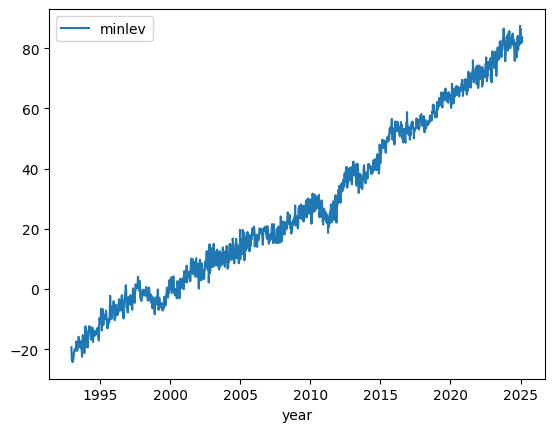

In [9]:
data.plot("year", "minlev")

The line `data.plot("year", "minlev")` creates a line plot using the pandas built-in plotting function called `plot`.

- `"year"` is used for the x-axis – it represents time (decimal years).
- `"minlev"` is used for the y-axis – it represents the minimum sea level value.
- This plot will show how the minimum value across the selected satellites changes over time.

It's a quick way to visualize trends in the sea level measurements across different satellite missions.

## **Observations**

### It can be observed that there is a clear increasing trend in the data over the years, indicating that sea levels have been rising over time.

**MACHINE LEARNING**

In [11]:
slope, offset = np.polyfit(data["year"], data["minlev"], 1)

This line uses NumPy's `polyfit()` function to perform **linear regression** (fitting a straight line) to the data.

- `data["year"]` is the x-axis.
- `data["minlev"]` is the y-axis.
- `1` means you're fitting a **1st-degree polynomial**, which is a straight line:  
- The function returns the **slope** and **offset (intercept)** of the best-fitting line.

So, after this line runs:
- `slope` tells you how much sea level is rising per year.
- `offset` is the starting value of the line when `year = 0`.

This is often used to quantify the rate of sea level rise over time.

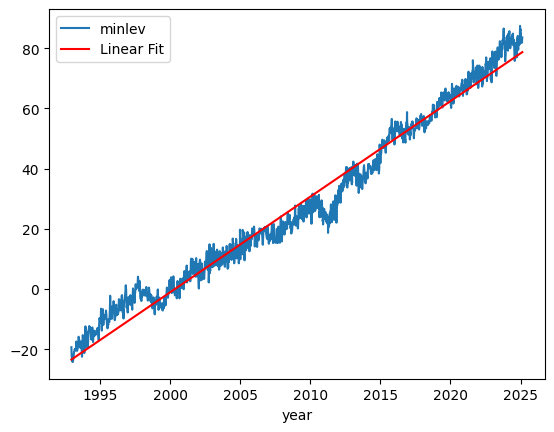

In [14]:
import matplotlib.pyplot as plt

# Plot original data
data.plot("year", "minlev", legend=True) #Legend is set to true to show the legend

# Fit line
slope, offset = np.polyfit(data["year"], data["minlev"], 1)
line = slope * data["year"] + offset # This is in the form of the line equation "y=mx+c"

# Plot the fitted line
plt.plot(data["year"], line, color='red', label='Linear Fit')
plt.legend() #shows the legend
plt.show()

**PROBLEM SOLUTION**

In [16]:
print("rate of sea level rise is {0:.2f} mm/yr".format(slope))

#slope tells you how much sea level is rising per year.

rate of sea level rise is 3.18 mm/yr
